<a href="https://colab.research.google.com/github/Al-ameen007/CIFAR_10/blob/main/Ml_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Theoritcal Foundation of Machine Learning Final Project 


1.   Youseef Osama Ahmed 20190629
2.   Mohamed Alameen AbdAlziz 20190720
3.   Osama Khaled Abd-Alghafar
4.   Solhof
5.   Amira



In [1]:
import numpy as np

# Loading the data
Using the keras datasets to load the data, the data is already splitied into train and test sets.
We just going to take a portion of the train to make a validation set

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


# Exploring the Data

(<matplotlib.image.AxesImage at 0x7f8e2eb39510>, array([9], dtype=uint8))

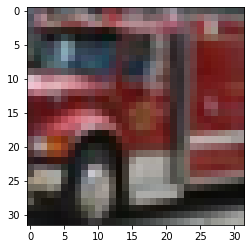

In [3]:
import matplotlib.pyplot as plt
index = 88
plt.imshow(X_train[index]), y_train[index]

some image are too bad even a human being can't recognize it given the following image which is suppose to be for a **Deer**

(<matplotlib.image.AxesImage at 0x7f8e2e5e1690>, array([4], dtype=uint8))

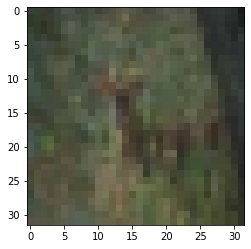

In [4]:
plt.imshow(X_train[10]), y_train[10]

In [5]:
labels = {1:  'airplane',   #back to the documntation
          2:  'bird', 
          3:  'cat', 
          4:  'deer', 
          5:  'dog', 
          6:  'frog', 
          7:  'horse', 
          8:  'ship', 
          9:  'truck'}

In [6]:
unique, counts = np.unique(y_train, return_counts=True) #all the classes equal to each other
dict(zip(unique, counts))

{0: 5000,
 1: 5000,
 2: 5000,
 3: 5000,
 4: 5000,
 5: 5000,
 6: 5000,
 7: 5000,
 8: 5000,
 9: 5000}

# Data Preprocessing

## Avg Pooling

 looking at the first image at the first pixel (0, 0) coordinates,at each pixel we got three RGB values and we are going to replace them by a single value computed by their avreage.

In [7]:
def avg_pixels(data):
  data_avg = data.copy()
  for i in range(len(data)): #looping over the data
    for x in range(len(data[0])): #looping over the x_coordinates
      for y in range(len(data[0].T[0])): #looping over the y_coordinates
        data_avg[i][x][y] = np.average(data[i][x][y])
  return data_avg

In [8]:
X_train_avg = avg_pixels(X_train)

In [9]:
len(X_train_avg) #for debugging

50000

After Averging the images there is no change, they are only converted into gray images like the following examples

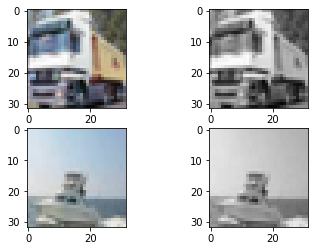

In [10]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(X_train[1])
axarr[0,1].imshow(X_train_avg[1])
axarr[1,0].imshow(X_train[100])
axarr[1,1].imshow(X_train_avg[100])

Since now all the RGB channels got the same value no need to keep them all, instead we are going to keep only a single chanel, converting each image into a 32x32 matrix, which will provide an efficient way in computation      
ex. the first pixel of the first image will get the values (61, 61, 61) so  we will make it one channel (61)

In [11]:
X_train_avg[0][0][0]

array([61, 61, 61], dtype=uint8)

In [12]:
def convert(data):
  imgs = []
  for i in range(len(data)):
    img = []
    for j in range(len(data[0])):
      tmp = [int(np.unique(hold)[0]) for hold in X_train_avg[i][j]]
      img.append(tmp)
    imgs.append(img)
  return np.asarray(imgs)

In [13]:
X_train_conv = convert(X_train_avg)

In [ ]:
def transform(data):
  transformed_data = avg_pixels(data)
  return convert(transformed_data)

In [14]:
len(X_train_conv)

50000

a sample for converted image into 32 * 32 

In [15]:
max(X_train_conv[0].flatten()) * 29791

7328586

## Applying the momentum 

In [16]:
def c_momentum(data, c = 3):
  m_data = []
  mean_x = (len(data[0][0]) + 1) / 2
  mean_y = (len(data[0][0].T) + 1) / 2
  for img in data:
    ms = []
    for p in range(c+1):
      for q in range(c+1):
        if p + q <= c:
          tmp = np.multiply((np.power(np.arange(len(data[0][0])) - mean_x, p) * np.power(np.arange(len(data[0].T[0] - mean_y)), q)) , img)
          ms.append(tmp.sum().sum())
    m_data.append(ms)
  return np.asarray(m_data)

In [17]:
X_train_m = c_momentum(X_train_conv, c  = 3)

In [18]:
len(X_train_m[0])

10

In [19]:
len(X_train_m)

50000

In [20]:
X_train_m[0]

array([ 1.05589000e+05,  1.63695100e+06,  3.37076310e+07,  7.79918347e+08,
       -1.05267500e+05,  6.69793950e+06,  2.23742436e+08,  8.43485325e+06,
        1.13226434e+08, -2.59486449e+07])

## Spliting the train data into train and validation by 10%

In [21]:
from sklearn.model_selection import train_test_split
X_trainn, X_val, y_trainn, y_val = train_test_split(X_train_m, y_train, test_size=0.1)

In [22]:
len(X_trainn), len(X_val)

(45000, 5000)

# Building the Model


As we can see below many diffrient models with diffrient hyperparamters couldn't catch the complexity of the model even the SVMs with rbf and polynomial kernal. this might be due to many resons


*   Quality of the data, data doesn't have enough information
*   simplicity of the models, even tuning the hyper-parapmeters won't add that much
*   increasing the number of the instances will not add to much, models are too simple 


*   CNN as we see below are a much more complex model enabling them to detect patterns, edges, ..etc, perform much better





## SVM

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
svc1 = SVC()
svc1.fit(X_trainn, y_trainn.ravel())
svc2 = SVC(kernel='poly', degree=3)
svc2.fit(X_trainn, y_trainn.ravel())
svc3 = SVC(kernel='sigmoid', gamma='auto')
svc3.fit(X_trainn, y_trainn.ravel())

SVC()

In [ ]:
accuracy_score(svc1.predict(X_val), y_val)
accuracy_score(svc2.predict(X_val), y_val)
accuracy_score(svc2.predict(X_val), y_val)

0.1874

##Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest1 = RandomForestClassifier(criterion='entropy', max_depth=50)
forest1.fit(X_trainn, y_trainn.ravel())
forest2 = RandomForestClassifier(criterion='gini', max_depth=70)
forest2.fit(X_trainn, y_trainn.ravel())
forest3 = RandomForestClassifier(criterion='entropy', max_depth=100)
forest3.fit(X_trainn, y_trainn.ravel())

RandomForestClassifier(criterion='entropy', max_depth=70)

In [ ]:
accuracy_score(forest1.predict(X_val), y_val)
accuracy_score(forest2.predict(X_val), y_val)
accuracy_score(forest3.predict(X_val), y_val)

0.1842

##Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=100)
tree1.fit(X_trainn, y_trainn.ravel())
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=150)
tree2.fit(X_trainn, y_trainn.ravel())
tree3 = DecisionTreeClassifier(criterion='gini', max_depth=200)
tree3.fit(X_trainn, y_trainn.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [ ]:
accuracy_score(tree1.predict(X_val), y_val)
accuracy_score(tree2.predict(X_val), y_val)
accuracy_score(tree3.predict(X_val), y_val)

0.1388

##KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=4)
knn1.fit(X_trainn, y_trainn.ravel())
knn2 = KNeighborsClassifier(n_neighbors=6)
knn2.fit(X_trainn, y_trainn.ravel())
knn3 = KNeighborsClassifier(n_neighbors=8)
knn3.fit(X_trainn, y_trainn.ravel())

KNeighborsClassifier(n_neighbors=6)

In [ ]:
accuracy_score(knn1.predict(X_val), y_val)
accuracy_score(knn2.predict(X_val), y_val)
accuracy_score(knn3.predict(X_val), y_val)

0.1598

## Trying diffrent momentum value

In [ ]:
X_train_m7 = c_momentum(X_train_conv, c = 7)

In [ ]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_train_m7, y_train, test_size=0.1)

In [ ]:
svc_m7 = SVC()
svc_m7.fit(X_train7, y_train7.ravel())

SVC()

In [ ]:
accuracy_score(svc_m7.predict(X_test7), y_test7)

0.1578

In [ ]:
X_train_m44 = c_momentum(X_train_conv, c = 44) ##Then number of momentums equal to number of pixels 1035

In [ ]:
X_train44, X_val44, y_train44, y_val44 = train_test_split(X_train_m44, y_train, test_size=0.1)

In [ ]:
svc_m44 = SVC()
svc_m44.fit(X_train44, y_train44.ravel())

SVC()

In [ ]:
accuracy_score(svc_m44.predict(X_val44), y_val44)

0.1514

## ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import models, layers

In [ ]:
model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(len(X_trainn[0]),)))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 5)                 55        
                                                                 
 dense_21 (Dense)            (None, 4)                 24        
                                                                 
 dense_22 (Dense)            (None, 3)                 15        
                                                                 
 dense_23 (Dense)            (None, 10)                40        
                                                                 
Total params: 134
Trainable params: 134
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_trainn, y_trainn, epochs=10, 
                    validation_data=(X_val, y_val))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1407/1407 [==============================] - 6s 4ms/step - loss: 11157878.0000 - accuracy: 0.1000 - val_loss: 5688.5918 - val_accuracy: 0.0942
Epoch 2/10
1407/1407 [==============================] - 7s 5ms/step - loss: 3943.1523 - accuracy: 0.0978 - val_loss: 2091.5591 - val_accuracy: 0.0982
Epoch 3/10
1407/1407 [==============================] - 4s 3ms/step - loss: 1668.0394 - accuracy: 0.0987 - val_loss: 670.0560 - val_accuracy: 0.0980
Epoch 4/10
1407/1407 [==============================] - 3s 2ms/step - loss: 690.8050 - accuracy: 0.0985 - val_loss: 68.9232 - val_accuracy: 0.0942
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 293.5260 - accuracy: 0.0976 - val_loss: 2.3032 - val_accuracy: 0.1028
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 103.5554 - accuracy: 0.0984 - val_loss: 2.3031 - val_accuracy: 0.0948
Epoch 7/10
1407/1407 [==============================] - 5s 3ms/step - loss: 56.1116 - accuracy: 0.0987 - val_loss: 2.30

CNN on the normal data

In [ ]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [ ]:
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10))

In [ ]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model2.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.7409 - accuracy: 0.4035 - val_loss: 1.3824 - val_accuracy: 0.4979
Epoch 2/10
1563/1563 [==============================] - 104s 67ms/step - loss: 1.2965 - accuracy: 0.5372 - val_loss: 1.2201 - val_accuracy: 0.5726
Epoch 3/10
1563/1563 [==============================] - 107s 68ms/step - loss: 1.1425 - accuracy: 0.5999 - val_loss: 1.2571 - val_accuracy: 0.5669
Epoch 4/10
1563/1563 [==============================] - 104s 67ms/step - loss: 1.0365 - accuracy: 0.6384 - val_loss: 1.0544 - val_accuracy: 0.6386
Epoch 5/10
1563/1563 [==============================] - 104s 67ms/step - loss: 0.9634 - accuracy: 0.6652 - val_loss: 1.0422 - val_accuracy: 0.6305
Epoch 6/10
1563/1563 [==============================] - 159s 102ms/step - loss: 0.8976 - accuracy: 0.6877 - val_loss: 1.0347 - val_accuracy: 0.6467
Epoch 7/10
1563/1563 [==============================] - 99s 63ms/step - loss: 0.8327 - accuracy: 0.7102 - val_loss: 1

313/313 - 4s - loss: 1.0450 - accuracy: 0.6702 - 4s/epoch - 12ms/step


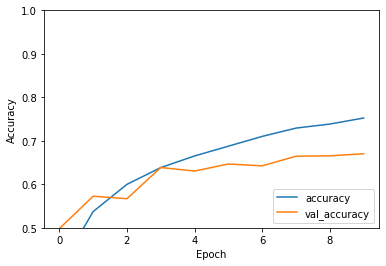

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(X_test,  y_test, verbose=2)


# Error Analysis

In [ ]:
from sklearn.metrics import confusion_matrix

cf_mat = confusion_matrix(y_train, [np.argmax(i) for i in model2.predict(X_train)])

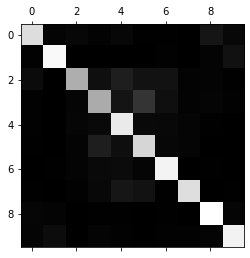

In [ ]:
plt.matshow(cf_mat, cmap = plt.cm.gray)
plt.show()